In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv("/content/osteoporosis.csv")

In [33]:
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [34]:
df.isna().sum()

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

In [35]:
df.columns

Index(['Id', 'Age', 'Gender', 'Hormonal Changes', 'Family History',
       'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Alcohol Consumption',
       'Medical Conditions', 'Medications', 'Prior Fractures', 'Osteoporosis'],
      dtype='object')

In [36]:
df=df.drop(columns={'Id'},axis=1)

In [37]:
df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


# printing the unique values of each column

In [38]:
for i in df.columns:
  print(i,'values: ',df[i].unique())

Age values:  [69 32 89 78 38 41 20 39 70 19 47 55 81 77 50 75 66 76 59 79 64 68 72 24
 90 56 35 21 31 26 88 61 25 52 53 67 23 71 80 51 65 57 43 58 46 62 82 18
 28 22 45 29 40 54 44 60 30 49 83 74 87 73 36 85 34 86 33 37 84 48 42 63
 27]
Gender values:  ['Female' 'Male']
Hormonal Changes values:  ['Normal' 'Postmenopausal']
Family History values:  ['Yes' 'No']
Race/Ethnicity values:  ['Asian' 'Caucasian' 'African American']
Body Weight values:  ['Underweight' 'Normal']
Calcium Intake values:  ['Low' 'Adequate']
Vitamin D Intake values:  ['Sufficient' 'Insufficient']
Physical Activity values:  ['Sedentary' 'Active']
Smoking values:  ['Yes' 'No']
Alcohol Consumption values:  ['Moderate' nan]
Medical Conditions values:  ['Rheumatoid Arthritis' nan 'Hyperthyroidism']
Medications values:  ['Corticosteroids' nan]
Prior Fractures values:  ['Yes' 'No']
Osteoporosis values:  [1 0]


# Checking %of null rows

In [46]:
for i in ['Alcohol Consumption','Medical Conditions','Medications']:
  print((df[i].isna().sum()/df[i].shape)*100)

[50.45965271]
[33.04392237]
[50.30643514]


In [53]:
df[['Alcohol Consumption','Medical Conditions','Medications']]

,Alcohol Consumption,Medical Conditions,Medications
0,Moderate,Rheumatoid Arthritis,Corticosteroids
1,NaN,NaN,NaN
2,Moderate,Hyperthyroidism,Corticosteroids
3,NaN,Rheumatoid Arthritis,Corticosteroids
4,NaN,Rheumatoid Arthritis,NaN
...,...,...,...
1953,Moderate,Rheumatoid Arthritis,NaN
1954,NaN,NaN,Corticosteroids
1955,NaN,Hyperthyroidism,NaN
1956,NaN,Rheumatoid Arthritis,Corticosteroids


In [56]:
df[['Alcohol Consumption','Medical Conditions','Medications']]=np.where(df[['Alcohol Consumption','Medical Conditions','Medications']].isna(),'None',df[['Alcohol Consumption','Medical Conditions','Medications']])

# performing one hot encoding

In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [64]:
encoder=OneHotEncoder(drop='first')
lencoder=LabelEncoder()

In [65]:
df['Alcohol Consumption']

0       Moderate
1           None
2       Moderate
3           None
4           None
          ...   
1953    Moderate
1954        None
1955        None
1956        None
1957        None
Name: Alcohol Consumption, Length: 1958, dtype: object

In [66]:
encoded_df=pd.DataFrame(encoder.fit_transform(df[['Gender','Hormonal Changes','Family History',
                                                  'Race/Ethnicity','Smoking','Prior Fractures','Medical Conditions']]).toarray(),columns=encoder.get_feature_names_out())
columns=['Body Weight','Calcium Intake','Vitamin D Intake','Physical Activity','Alcohol Consumption','Medications']
weight_bodyweight={'Underweight':0,
                'Normal':1}
mapped_data = [weight_bodyweight[label] for label in df['Body Weight']]
print(mapped_data)
calcium_mapping={'Low':0, 'Adequate':1}
cal_mapped_data=[calcium_mapping[i] for i in df['Calcium Intake']]
df['Calcium Intake']=cal_mapped_data
vit_mapping={'Sufficient':1 ,'Insufficient':0}
vit_mapped=[vit_mapping[i] for i in df['Vitamin D Intake']]
df['Vitamin D Intake']=vit_mapped
physical_mapping={'Sedentary':0,'Active':1}
phy_mapped=[physical_mapping[i] for i in df['Physical Activity']]
df['Physical Activity']=phy_mapped
aclholo_mapping={'Moderate':0,'None':1}
alco_mapped=[aclholo_mapping[i] for i in df['Alcohol Consumption']]
df['Alcohol Consumption']=alco_mapped
medic_mapping={'Corticosteroids':0,'None':1}
medi_mapped=[medic_mapping[i] for i in df['Medications']]
df['Medications']=medi_mapped


[0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 

In [67]:
df['Body Weight']=mapped_data

In [68]:
encoded_df.head()

,Gender_Male,Hormonal Changes_Postmenopausal,Family History_Yes,Race/Ethnicity_Asian,Race/Ethnicity_Caucasian,Smoking_Yes,Prior Fractures_Yes,Medical Conditions_None,Medical Conditions_Rheumatoid Arthritis
0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0


# joining the encoded df back to original df

In [69]:
df=pd.concat([df,encoded_df],axis=1)

In [70]:
df=df.drop(columns={'Gender','Race/Ethnicity','Hormonal Changes','Family History','Smoking','Prior Fractures','Medical Conditions'})

In [146]:
df.head()
df1= df.loc[:, df.columns != 'Osteoporosis'].join(df.loc[:, 'Osteoporosis'])
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Applying linear regression on a binary classification problem to see how it performs

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

regressor=LinearRegression()
regressor.fit(xtrain,ytrain)
ypred=regressor.predict(xtest)

In [150]:
r_squared = r2_score(ytest, ypred)
print("R-squared:", r_squared*100)

R-squared: 45.8391109981419


In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,roc_curve, roc_auc_score

# Using Logistic regression now

In [153]:
logistic=LogisticRegression(max_iter=1000)
logistic.fit(xtrain,ytrain)
ypred1=logistic.predict(xtest)
tn, fp, fn, tp = confusion_matrix(ytest, ypred1).ravel()
specificity = tn / (tn + fp)
print("Metrics for Logistic Regression model")
print("Accuracy",accuracy_score(ytest,ypred1))
print("Precision",precision_score(ytest,ypred1))
print("the confusion matrix is: ")
print(str(confusion_matrix(ytest,ypred1)))
print("specificity is: ",specificity)

Metrics for Logistic Regression model
Accuracy 0.8086734693877551
Precision 0.8333333333333334
the confusion matrix is: 
[[162  31]
 [ 44 155]]
specificity is:  0.8393782383419689


# Decision Tree

In [154]:
df.groupby('Osteoporosis')['Osteoporosis'].count()

Osteoporosis
0    979
1    979
Name: Osteoporosis, dtype: int64

In [155]:
decision=DecisionTreeClassifier(max_depth=20)
decision.fit(xtrain,ytrain)
ypred_train=decision.predict(xtrain)
ypred2=decision.predict(xtest)
print("Decision Tree metrics")
tn, fp, fn, tp = confusion_matrix(ytest, ypred2).ravel()
specificity = tn / (tn + fp)
print("Accuracy",accuracy_score(ytest,ypred2))
print("Precision",precision_score(ytest,ypred2))
print("the confusion matrix is: ")
print(str(confusion_matrix(ytest,ypred2)))
print("specificity is: ",specificity)

Decision Tree metrics
Accuracy 0.8163265306122449
Precision 0.7981220657276995
the confusion matrix is: 
[[150  43]
 [ 29 170]]
specificity is:  0.7772020725388601


In [156]:
print("F1 scores of models")
print("Logistic regression",f1_score(ytest,ypred1))
print("Decision tree",f1_score(ytest,ypred2))

F1 scores of models
Logistic regression 0.8051948051948052
Decision tree 0.8252427184466019


In [157]:
from sklearn import tree

[Text(0.5956547004132231, 0.975, 'x[0] <= 38.5\ngini = 0.5\nsamples = 1566\nvalue = [786, 780]'),
 Text(0.5915224690082644, 0.925, 'x[0] <= 22.5\ngini = 0.341\nsamples = 1005\nvalue = [786, 219]'),
 Text(0.30765754132231404, 0.875, 'x[0] <= 21.5\ngini = 0.204\nsamples = 503\nvalue = [445, 58]'),
 Text(0.19021177685950413, 0.825, 'x[12] <= 0.5\ngini = 0.188\nsamples = 420\nvalue = [376, 44]'),
 Text(0.11079545454545454, 0.775, 'x[6] <= 0.5\ngini = 0.218\nsamples = 209\nvalue = [183, 26]'),
 Text(0.0625, 0.725, 'x[10] <= 0.5\ngini = 0.265\nsamples = 102\nvalue = [86, 16]'),
 Text(0.03512396694214876, 0.675, 'x[3] <= 0.5\ngini = 0.146\nsamples = 63\nvalue = [58, 5]'),
 Text(0.01652892561983471, 0.625, 'x[0] <= 19.5\ngini = 0.245\nsamples = 28\nvalue = [24, 4]'),
 Text(0.008264462809917356, 0.575, 'x[15] <= 0.5\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.004132231404958678, 0.525, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.012396694214876033, 0.525, 'x[9] <= 0.5\ngin

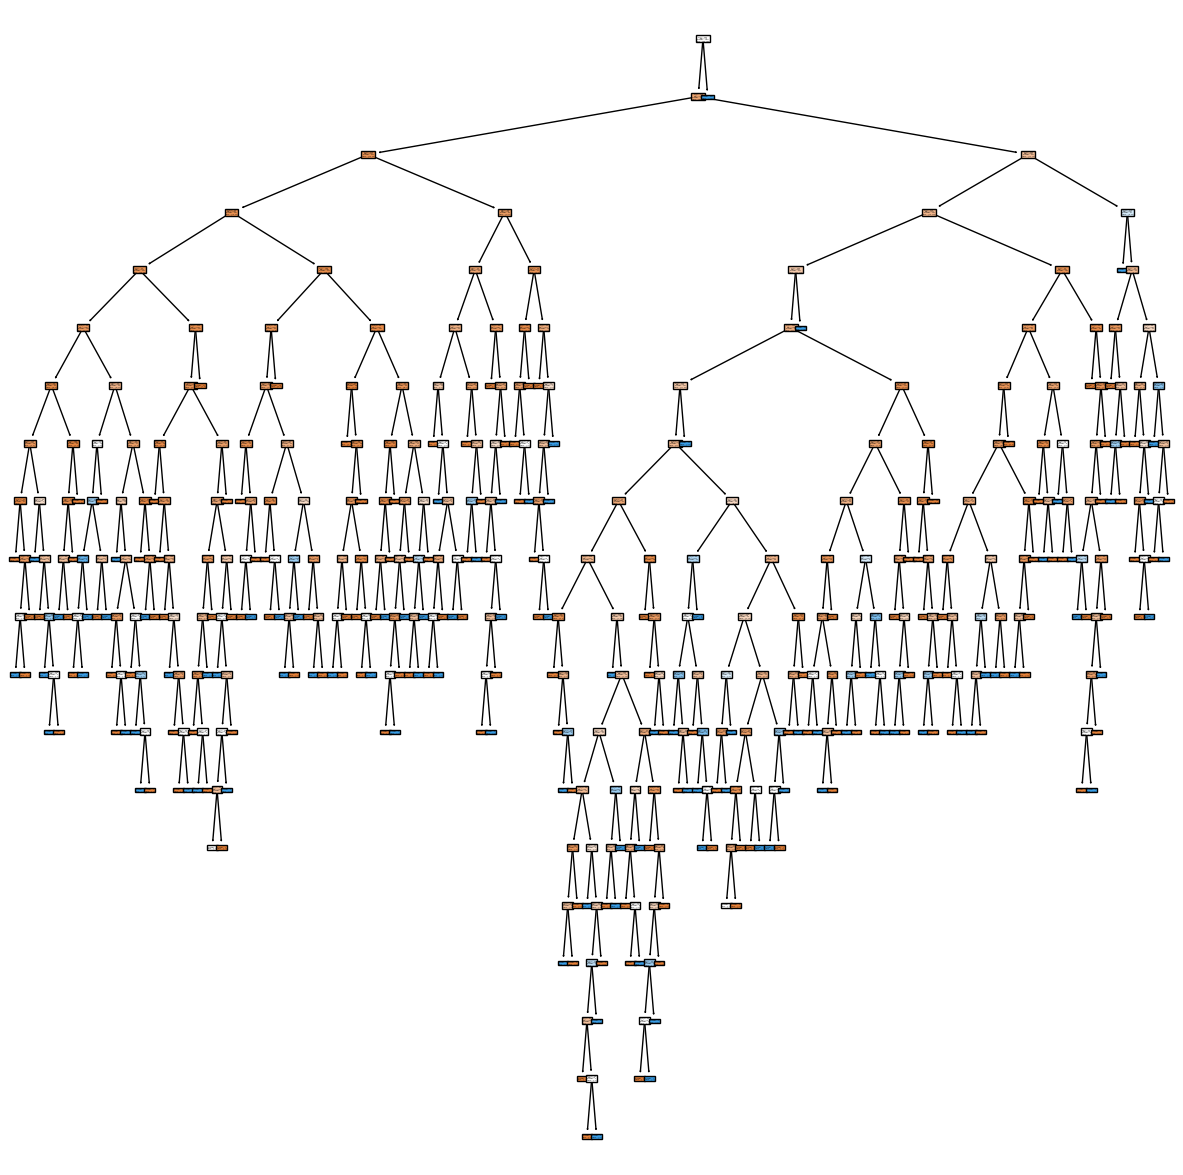

In [158]:
plt.figure(figsize=(15,15))
tree.plot_tree(decision,filled=True)

# using Grid Search CV to figure out the optimal depth of the decision tree

In [159]:
from sklearn.model_selection import GridSearchCV

In [160]:
param_grid={'max_depth':range(1,11)}

In [161]:
search=GridSearchCV(decision,param_grid,cv=10)
search.fit(xtrain,ytrain)
print('the best value for max depth is ',search.best_params_)

the best value for max depth is  {'max_depth': 7}


In [162]:
decision1=DecisionTreeClassifier(max_depth=7)
decision1.fit(xtrain,ytrain)
ypred11=decision.predict(xtest)
print("New Decision Tree metrics")
print("Accuracy",accuracy_score(ytest,ypred11))
print("Precision",precision_score(ytest,ypred11))
print("the confusion matrix is: ")
print(str(confusion_matrix(ytest,ypred11)))

New Decision Tree metrics
Accuracy 0.8163265306122449
Precision 0.7981220657276995
the confusion matrix is: 
[[150  43]
 [ 29 170]]
